# Exploring different integration techniques 

testing different integration techniques for discrete approximations of such.

using a circle a as the basic object to integrate over (for the beginning), i.e. 
$$
H(q,p) = \frac{q^2}{2} + \frac{p^2}{2}
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
 # import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

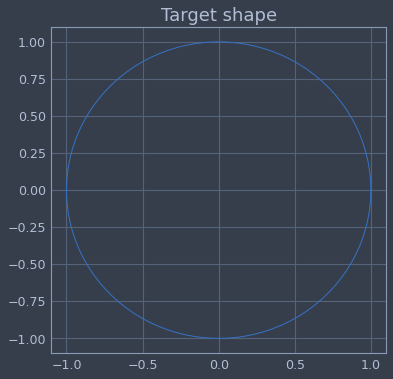

In [10]:
# data
x = np.linspace(0,np.pi*2,100)

# plot target 
plt.figure(figsize=(6,6))
plt.plot(np.cos(x), np.sin(x), linewidth=1)
plt.title('Target shape', fontsize=18);

### #1 Euler's method

given the Hamiltonian equation as 
$$
H(q,p) = U(q) + K(p)
$$

and assuming a very basic standard Gaussian to form the kinetic energy $K(p) = \frac{p^T M^{-1} p}{2}$, where $M = diag(m_1, \dots, m_d)$

then the updates with Euler's method are defined as the following:

\begin{align}
p_i(t + \epsilon) & = p_i(t) + \epsilon \frac{dp_i}{dt} (t) = p_i(t) - \epsilon \frac{\partial U}{\partial q_i}(q(t))  \\
q_i(t + \epsilon) & = q_i(t) + \epsilon \frac{dq_i}{dt} (t) = q_i(t) + \epsilon \frac{p_i(t)}{m_i}
\end{align}


In [11]:
def compute_euler_step(p, q, **kwargs):
    """Computes update of Euler's method for integral approximation. """
    pt = p - kwargs['eps'] * q
    qt = q + kwargs['eps'] * (p / 1)
    return qt, pt

def run_eulers_method(steps = 60, step_size = .1):
    """Runs eulers method for a defined number of steps. """
    acc = np.zeros((steps,2))
    q, p = 0, 1  # init params 
    for i in range(steps):
        q, p = compute_euler_step(p=p, q=q, eps=step_size)
        acc[i] = [q, p]
    return acc 

In [12]:
steps60_stepsize01 = run_eulers_method()
steps40_stepsize03 = run_eulers_method(40, .3)
steps10_stepsize05 = run_eulers_method(10, .5)
steps8_stepsize07 = run_eulers_method(8, .7)

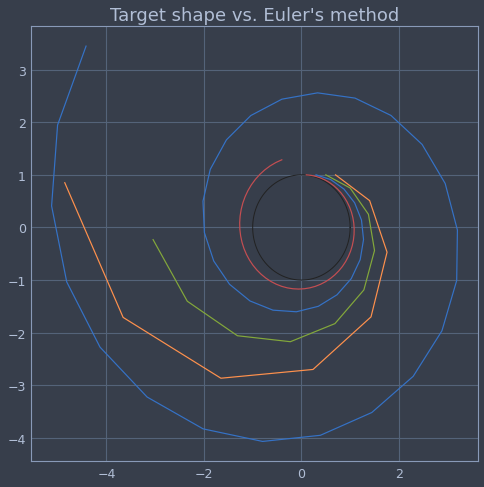

In [13]:
# data
x = np.linspace(0,np.pi*2,100)

# plot target 
plt.figure(figsize=(8,8))
plt.plot(np.cos(x), np.sin(x), '-k', linewidth=1)
plt.plot(steps60_stepsize01[:, 0], steps60_stepsize01[:, 1], 'x-r')
plt.plot(steps40_stepsize03[:, 0], steps40_stepsize03[:, 1], 'x-b')
plt.plot(steps10_stepsize05[:, 0], steps10_stepsize05[:, 1], 'x-g')
plt.plot(steps8_stepsize07[:, 0], steps8_stepsize07[:, 1], 'x-y')
plt.title("Target shape vs. Euler's method", fontsize=18);

### #2 Modified Euler method

where the update of the first pararmter is used right away for the update of the second parameter.

The rest stays unchanged:

\begin{align}
p_i(t + \epsilon) & = p_i(t) + \epsilon \frac{dp_i}{dt} (t) = p_i(t) - \epsilon \frac{\partial U}{\partial q_i}(q(t))  \\
q_i(t + \epsilon) & = q_i(t) + \epsilon \frac{dq_i}{dt} (t) = q_i(t) + \epsilon \frac{p_i(t + \epsilon)}{m_i}
\end{align}

In [14]:
def compute_modified_euler_step(p, q, **kwargs):
    """Computes update of Euler's method for integral approximation. """
    pt = p - kwargs['eps'] * q
    qt = q + kwargs['eps'] * (pt / 1)
    return qt, pt

def run_modified_eulers_method(steps = 60, step_size = .1):
    """Runs eulers method for a defined number of steps. """
    acc = np.zeros((steps,2))
    q, p = 0, 1  # init params 
    for i in range(steps):
        q, p = compute_modified_euler_step(p=p, q=q, eps=step_size)
        acc[i] = [q, p]
    return acc 

In [15]:
mod01 = run_modified_eulers_method()
mod02 = run_modified_eulers_method(40, .3)
mod03 = run_modified_eulers_method(10, .5)
mod04 = run_modified_eulers_method(8, .7)

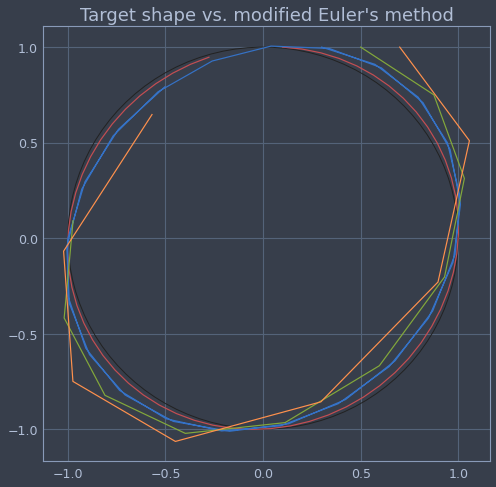

In [16]:
# data
x = np.linspace(0,np.pi*2,100)

# plot target 
plt.figure(figsize=(8,8))
plt.plot(np.cos(x), np.sin(x), '-k', linewidth=1)
plt.plot(mod01[:, 0], mod01[:, 1], 'x-r')
plt.plot(mod02[:, 0], mod02[:, 1], 'x-b')
plt.plot(mod03[:, 0], mod03[:, 1], 'x-g')
plt.plot(mod04[:, 0], mod04[:, 1], 'x-y')
plt.title("Target shape vs. modified Euler's method", fontsize=18);

the modified version of Euler's method is volume preserving (except for the error induced by discretizing), such that it could trace the circle exactly. this is due the determinant of its Jacobian being exactly 1, i.e. volume preserving. Otherwise, on can also observe that the update is a shear transformation in which only one variable changes w.r.t. the other. 

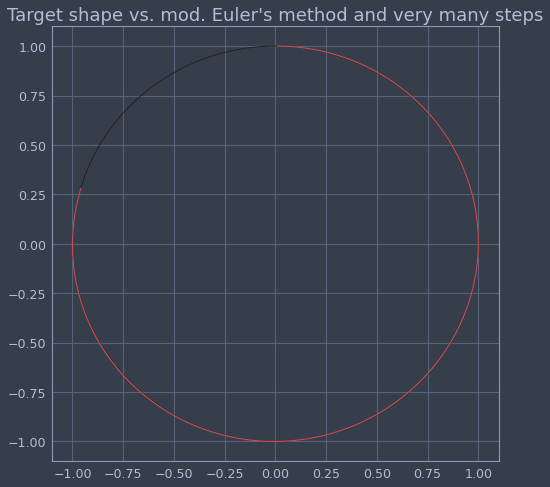

In [17]:
# data
x = np.linspace(0,np.pi*2,100)
y = run_modified_eulers_method(500, .01)

# plot target 
plt.figure(figsize=(8,8))
plt.plot(np.cos(x), np.sin(x), '-k', linewidth=1)
plt.plot(y[:, 0], y[:, 1], 'x-r')
plt.title("Target shape vs. mod. Euler's method and very many steps", 
          fontsize=18);

### #3 Leapfrog algorithm

basically a mix. of the modified Euler method for both the variables. the first variable is only updated for half a step, the second update a complete step using the updated first variable, and finally the second variable is updated a second half step using the updated second variable.

The rest stays unchanged:

\begin{align}
p_i(t + \epsilon / 2) & = p_i(t) + \frac{\epsilon}{2} \frac{dp_i}{dt} (t) = p_i(t) - \epsilon \frac{\partial U}{\partial q_i}(q(t))  \\
q_i(t + \epsilon) & = q_i(t) + \epsilon \frac{dq_i}{dt} (t) = q_i(t) + \epsilon \frac{p_i(t + \epsilon / 2)}{m_i}  \\
p_i(t + \epsilon / 2) & = p_i(t) + \frac{\epsilon}{2} \frac{dp_i}{dt} (t) = p_i(t) - \epsilon \frac{\partial U}{\partial q_i}(q_i(t + \epsilon))  \\
\end{align}

In [18]:
def compute_leapfrog(p, q, **kwargs):
    """Computes update of Euler's method for integral approximation. """
    pt = p - (kwargs['eps'] / 2) * q
    qt = q + kwargs['eps'] * (pt / 1)
    pt = pt - (kwargs['eps'] / 2) * qt
    return qt, pt

def run_leapfrog_method(steps = 60, step_size = .1):
    """Runs eulers method for a defined number of steps. """
    acc = np.zeros((steps,2))
    q, p = 0, 1  # init params 
    for i in range(steps):
        q, p = compute_leapfrog(p=p, q=q, eps=step_size)
        acc[i] = [q, p]
    return acc 

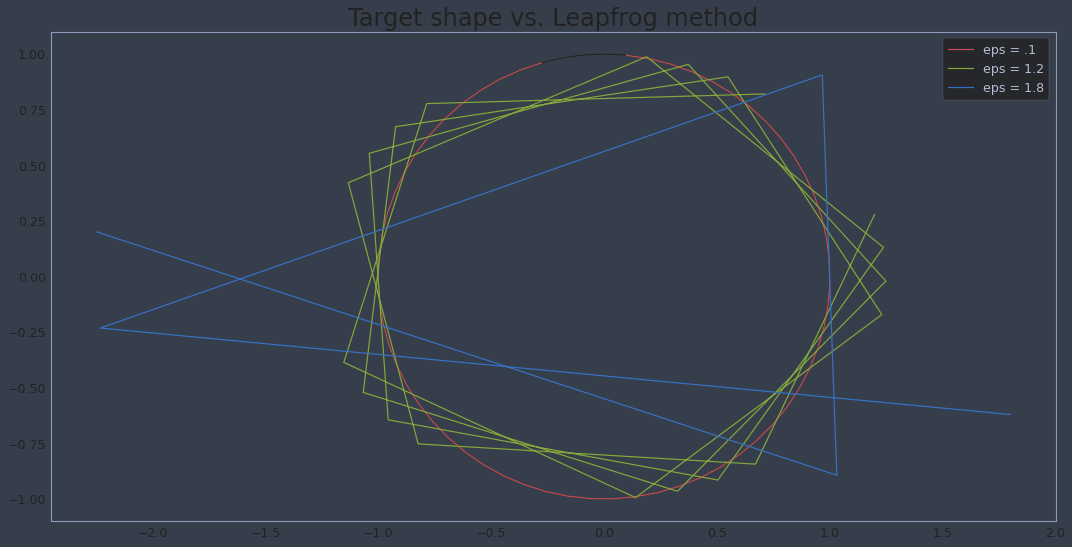

In [28]:
# data
x = np.linspace(0,np.pi*2,100)
y_leapfrog_small = run_leapfrog_method(60, .1)
y_leapfrog_bench = run_leapfrog_method(60, .3)
y_leapfrog_medium = run_leapfrog_method(20, 1.2)
y_leapfrog_large = run_leapfrog_method(5, 1.8)

# plot target 
plt.figure(figsize=(18,9))
plt.plot(np.cos(x), np.sin(x), '-k', linewidth=1)
plt.plot(y_leapfrog_small[:, 0], y_leapfrog_small[:, 1], 'x-r', label="eps = .1")
plt.plot(y_leapfrog_medium[:, 0], y_leapfrog_medium[:, 1], 'x-g', label="eps = 1.2")
plt.plot(y_leapfrog_large[:, 0], y_leapfrog_large[:, 1], 'x-b', label="eps = 1.8")
plt.tick_params(colors='k')
plt.title("Target shape vs. Leapfrog method", 
          fontsize=24, color='k')
plt.legend(facecolor="k")
plt.grid(False)
plt.savefig("../../presentation/figures/leapfrog_variations.png", 
            dpi=300, transparent=True)
plt.show();

while running the algorithm with small steps shows to preseve the volume and following the exact trajectory, an increase in step size yields bigger steps but introduces more error. Finally, when increasing the step size too far ($\epsilon = 1.8$), the trajectory is missed!

## 2 Notes on the errors of discretization methods

In general, as $\epsilon \to 0$ also the error will tend towards zero, such that any upper limit on the error will apply. For the case of the Hamiltonian, if the error on $(q,p) \leq \epsilon^2$ then also  the error on the Hamiltonian $H(q,p) \leq \epsilon^2$.

The _local error_ is the one being introduced per single step and is advanced throughout the integration over the trajectory. The _global error_ is the final error after a fixed time $t$ of integration, i.e. $\frac{t}{\epsilon}$ steps.

If the local error is given by $\epsilon^p$, then the global error is given by $\epsilon^{p-1}$ as it accumulates over the $\frac{t}{\epsilon}$ steps:
$$
\frac{t}{\epsilon} * \epsilon^p = t * \epsilon^{p-1}
$$

while the two Euler methods have a local error of $\epsilon^2$ and global error of order $\epsilon$, the Leapfrog algorithm has an error of order $\epsilon^3$ and $\epsilon^2$, respectively for local and global error. This is a consequence of the Leapfrog method being reversible [Leimkuhler & Reich, 2004].

## 3 Prepr. for Seminar Paper

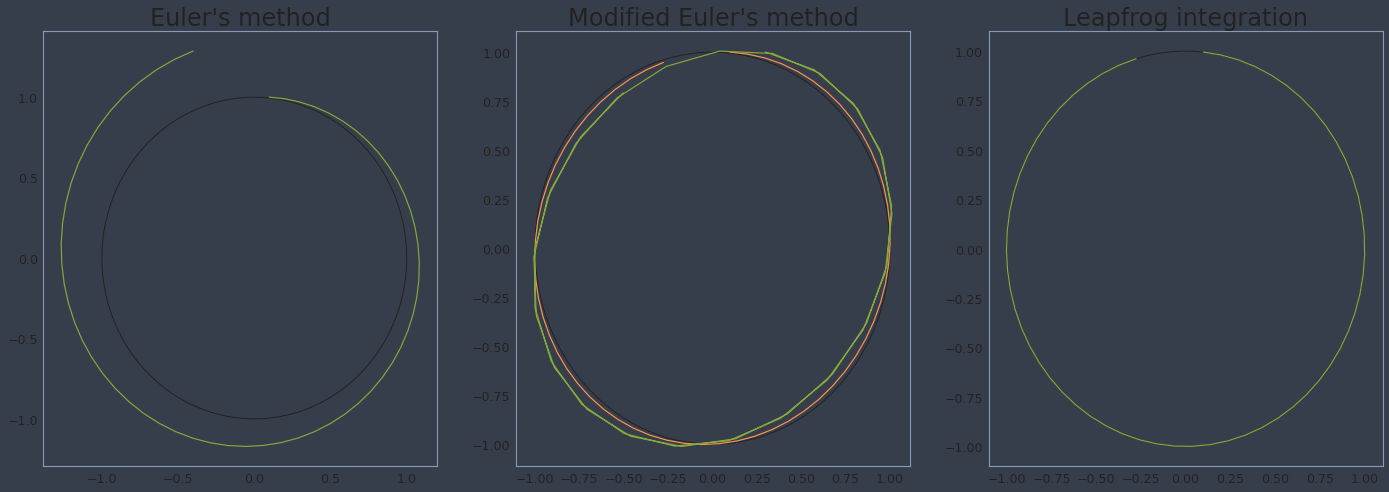

In [20]:
fig = plt.figure(figsize=(24,8))

ax1 = fig.add_subplot(131)
ax1.plot(np.cos(x), np.sin(x), '-k', linewidth=1)
ax1.plot(steps60_stepsize01[:, 0], steps60_stepsize01[:, 1], 'x-g')
ax1.tick_params(colors='k')
ax1.set_title("Euler's method", fontsize=24, color='k')
ax1.grid(False)

ax2 = fig.add_subplot(132)
ax2.plot(np.cos(x), np.sin(x), '-k', linewidth=1)
ax2.plot(mod01[:, 0], mod01[:, 1], 'x-y')
ax2.plot(mod02[:, 0], mod02[:, 1], 'x-g')
ax2.tick_params(colors='k')
ax2.set_title("Modified Euler's method", fontsize=24, color='k')
ax2.grid(False)

ax3 = fig.add_subplot(133)
ax3.plot(np.cos(x), np.sin(x), '-k', linewidth=1)
ax3.plot(y_leapfrog_small[:, 0], y_leapfrog_small[:, 1], 'x-g')
ax3.tick_params(colors='k')
ax3.set_title("Leapfrog integration", fontsize=24, color='k')
ax3.grid(False)

fig.savefig("../../presentation/figures/integration_methods.png", 
            dpi=300, transparent=True)
plt.show();

In [46]:
!pwd
!ls ../../presentation/figures

/home/maternus/GDrive/01_Documents/01_Education/02_StatistikStudium/07_StatWS2021/BayesSeminar/deliverables/hmc_example/integration_techniques
contourplot_energy_levels.png  lmu_logo_grey.png
gliding_typical_set.jpg        metropolis_random_walk.jpg
high-dim-sphere.png	       ratio_samples_in_sphere.png
hmc_visualization.jpg
